In [ ]:
# chapter 8-1 はじめてのscikit-learn

In [1]:
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
f = lambda x: np.exp(3 * x)

In [3]:
x_tr = np.linspace(0., 2, 200)
y_tr = f(x_tr)

In [4]:
x = np.array([0, .1, .2, .5, .8, .9, 1])
y = f(x) + np.random.randn(len(x))

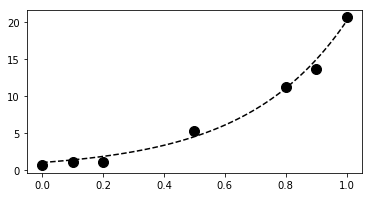

In [5]:
plt.figure(figsize=(6,3));
plt.plot(x_tr[:100], y_tr[:100], '--k');
plt.plot(x, y, 'ok', ms=10);

In [6]:
# モデルを作成
lr = lm.LinearRegression()
# 訓練データを使って学習を行う
lr.fit(x[:, np.newaxis], y)
# 学習済みモデルで予測を行う
y_lr = lr.predict(x_tr[:, np.newaxis])

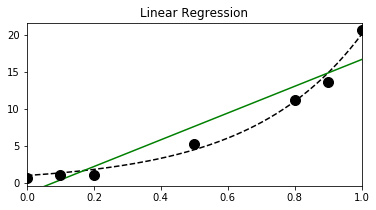

In [7]:
plt.figure(figsize=(6,3));
plt.plot(x_tr, y_tr, '--k');
plt.plot(x_tr, y_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.xlim(0, 1);
plt.ylim(y.min()-1, y.max()+1);
plt.title("Linear Regression");

22.80 -4.73 0.00
405.74 -928.57 724.43 -201.40 19.81 0.00


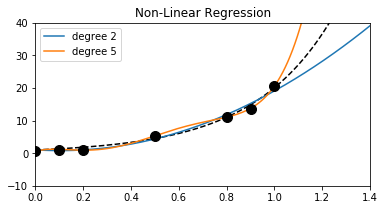

In [8]:
lrp = lm.LinearRegression()
plt.figure(figsize=(6,3));
plt.plot(x_tr, y_tr, '--k');

for deg in [2, 5]:
    lrp.fit(np.vander(x, deg + 1), y)
    y_lrp = lrp.predict(np.vander(x_tr, deg + 1))
    plt.plot(x_tr, y_lrp, label='degree ' + str(deg));
    plt.legend(loc=2);
    plt.xlim(0, 1.4);
    plt.ylim(-10, 40);
    # モデルの係数を表示
    print(' '.join(['%.2f' % c for c in lrp.coef_]))
plt.plot(x, y, 'ok', ms=10);
plt.title("Non-Linear Regression");

11.53 5.95 0.00
3.97 3.68 3.57 3.75 3.99 0.00


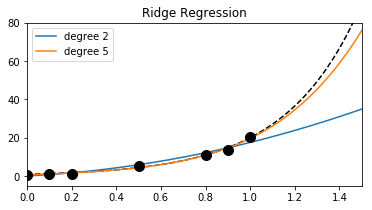

In [9]:
ridge = lm.RidgeCV()
plt.figure(figsize=(6,3));
plt.plot(x_tr, y_tr, '--k');

for deg in [2, 5]:
    ridge.fit(np.vander(x, deg + 1), y)
    y_ridge = ridge.predict(np.vander(x_tr, deg + 1))
    plt.plot(x_tr, y_ridge, label='degree ' + str(deg));
    plt.legend(loc=2);
    plt.xlim(0, 1.5);
    plt.ylim(-5, 80);
    # モデルの係数を表示
    print(' '.join(['%.2f' % c for c in ridge.coef_]))
plt.plot(x, y, 'ok', ms=10);
plt.title("Ridge Regression");

In [ ]:
# chapter 8-2 ロジスティック回帰を使った、タイタニック生存者の予測

In [10]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.linear_model as lm
import sklearn.cross_validation as cv
import sklearn.grid_search as gs
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Really_HP\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Really_HP\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [11]:
train = pd.read_csv('data/titanic_train.csv')
test = pd.read_csv('data/titanic_test.csv')

In [12]:
train[train.columns[[2,4,5,1]]].head()

,Pclass,Sex,Age,Survived
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0


In [13]:
data = train[['Sex', 'Age', 'Pclass', 'Survived']].copy()
data['Sex'] = data['Sex'] == 'female'
data = data.dropna()

In [14]:
data_np = data.astype(np.int32).values
X = data_np[:,:-1]
y = data_np[:,-1]

In [15]:
# 論理配列をいくつか定義する
female = X[:,0] == 1
survived = y == 1
# この配列は乗客の年齢を格納する
age = X[:,1]
# ヒストグラムを作成
bins_ = np.arange(0, 81, 5)
S = {'male': np.histogram(age[survived & ~female], bins=bins_)[0],
    'female': np.histogram(age[survived & female], bins=bins_)[0]}
D = {'male': np.histogram(age[~survived & ~female], bins=bins_)[0],
    'female': np.histogram(age[~survived & female], bins=bins_)[0]}

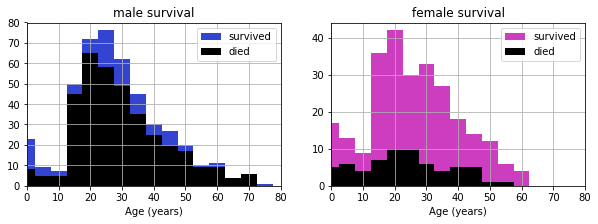

In [16]:
# データの表示
bins = bins_[:-1]
plt.figure(figsize=(10,3));
for i, sex, color in zip((0, 1), ('male', 'female'), ('#3345d0', '#cc3dc0')):
    plt.subplot(121 + i);
    plt.bar(bins, S[sex], bottom=D[sex], color=color, width=5, label='survived');
    plt.bar(bins, D[sex], color='k', width=5, label='died');
    plt.xlim(0, 80);
    plt.grid(None);
    plt.title(sex + " survival");
    plt.xlabel("Age (years)");
    plt.legend()

In [37]:
# Xとyを訓練用とテスト用に分割する
(X_train, X_test, y_train, y_test) = cv.train_test_split(X, y, test_size=0.5)

In [38]:
# 分類器をインスタンス化する
logreg = lm.LogisticRegression()

In [39]:
logreg.fit(X_train, y_train)
y_predicted = logreg.predict(X_test)

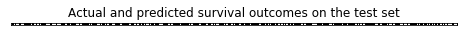

In [40]:
plt.figure(figsize=(8, 3));
plt.imshow(np.vstack((y_test, y_predicted)), interpolation='none', cmap='bone');
plt.xticks([]); plt.yticks([]);
plt.title(("Actual and predicted survival outcomes on the test set"));

In [41]:
cv.cross_val_score(logreg, X, y)

array([ 0.78661088,  0.78991597,  0.78059072])

In [42]:
grid = gs.GridSearchCV(logreg, {'C': np.logspace(-5, 5, 50)})
grid.fit(X_train, y_train)
grid.best_params_

{'C': 0.1206792640639329}

In [43]:
cv.cross_val_score(grid.best_estimator_, X, y)

array([ 0.79916318,  0.79411765,  0.77637131])

In [ ]:
# chapter 8-3 K近傍分類器を用いた手書き数字認識の学習

In [1]:
import numpy as np
import sklearn
import sklearn.datasets as ds
import sklearn.cross_validation as cv
import sklearn.neighbors as nb
import matplotlib.pyplot as plt
%matplotlib inline

/Users/Really/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
digits = ds.load_digits()
X = digits.data
y = digits.target
print((X.min(), X.max()))
print(X.shape)

(0.0, 16.0)
(1797, 64)


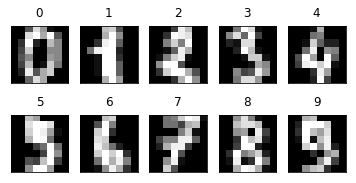

In [7]:
nrows, ncols = 2, 5
plt.figure(figsize=(6,3));
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(digits.images[i,...])
    plt.xticks([]); plt.yticks([]);
    plt.title(digits.target[i])

In [9]:
(X_train, X_test, y_train, y_test) = cv.train_test_split(X, y, test_size=.25)

In [11]:
knc = nb.KNeighborsClassifier()

In [12]:
knc.fit(X_train, y_train);

In [13]:
knc.score(X_test, y_test)

0.98222222222222222

In [14]:
# 1のデータを作成
one = np.zeros((8, 8))
one[1:-1, 4] = 16 # イメージの値は0から16の値とする
one[2, 3] = 16

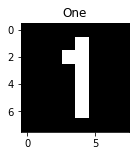

In [16]:
plt.figure(figsize=(2,2));
plt.imshow(one, interpolation='none');
plt.grid(False);
plt.xticks(); plt.yticks();
plt.title("One");

In [17]:
knc.predict(one.ravel())

/Users/Really/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([1])

In [18]:
# chapter 8-4 テキストからの学習 : 単純ベイズによる自然言語処理

In [19]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.cross_validation as cv
import sklearn.grid_search as gs
import sklearn.feature_extraction.text as text
import sklearn.naive_bayes as nb
import matplotlib.pyplot as plt
%matplotlib inline

/Users/Really/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [20]:
df = pd.read_csv("data/troll.csv")

In [21]:
df[['Insult', 'Comment']].tail()

,Insult,Comment
3942,1,"""you are both morons and that is never happening"""
3943,0,"""Many toolbars include spell check, like Yahoo..."
3944,0,"""@LambeauOrWrigley\xa0\xa0@K.Moss\xa0\nSioux F..."
3945,0,"""How about Felix? He is sure turning into one ..."
3946,0,"""You're all upset, defending this hipster band..."


In [22]:
y = df['Insult']

In [24]:
tf = text.TfidfVectorizer()
X = tf.fit_transform(df["Comment"])
print(X.shape)

(3947, 16469)


In [26]:
print(("Each samples has ~{0:.2f}% non-zero features.").format(100 * X.nnz / float(X.shape[0] * X.shape[1])))

Each samples has ~0.15% non-zero features.


In [27]:
(X_train, X_test, y_train, y_test) = cv.train_test_split(X, y, test_size=.2)

In [28]:
bnb = gs.GridSearchCV(nb.BernoulliNB(), param_grid={'alpha': np.logspace(-2., 2., 50)})
bnb.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-02,   1.20679e-02,   1.45635e-02,   1.75751e-02,
         2.12095e-02,   2.55955e-02,   3.08884e-02,   3.72759e-02,
         4.49843e-02,   5.42868e-02,   6.55129e-02,   7.90604e-02,
         9.54095e-02,   1.15140e-01,   1.38950e-01,   1.67683e-01,
         2....    3.90694e+01,   4.71487e+01,   5.68987e+01,   6.86649e+01,
         8.28643e+01,   1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [29]:
bnb.score(X_test, y_test)

0.77594936708860762

In [31]:
# 最初に各特徴に対応する単語を取り出す
names = np.asarray(tf.get_feature_names())
# 50番目までの大きな係数に対するものを取り出す
print(','.join(names[np.argsort(bnb.best_estimator_.coef_[0,:])[::-1][:50]]))

you,are,your,the,to,and,of,that,it,is,in,like,on,have,for,re,not,an,just,idiot,get,so,xa0,all,this,what,don,with,do,be,go,up,fuck,can,as,stupid,or,but,know,no,who,ass,if,about,little,here,me,back,out,dumb


In [32]:
print(bnb.predict(tf.transform(["I totally agree with you.", "You are so stupid", "I love you."])))

[0 1 1]


In [34]:
# chapter 8-5 サポートベクターマシンを使った分類

In [35]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.datasets as ds
import sklearn.cross_validation as cv
import sklearn.grid_search as gs
import sklearn.svm as svm
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
X = np.random.randn(200, 2)
y = X[:, 0] + X[:, 1] > 1

In [43]:
# 分類器を訓練する
est = svm.LinearSVC()
est.fit(X, y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [45]:
# [-3, 3]の矩形領域にグリッドを定義する
xx, yy = np.meshgrid(np.linspace(-3, 3,500), np.linspace(-3, 3, 500))
# SVM推定器を入力とする
def plot_decision_function(est):
    # グリッド上で決定関数を評価する
    Z = est.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cmap = plt.cm.Blues
    # グリッド上で決定関数を描画する
    plt.figure(figsize=(5,5));
    plt.imshow(Z, extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto', origin='lower', cmap=cmap);
    # 境界の描画
    plt.contour(xx, yy, Z, levels=[0], linewidth=2, colors='k');
    # ラベルの値に従って点を描画する
    plt.scatter(X[:, 0], X[:, 1], s=30, c=.5+.5*y, lw=1, cmap=cmap, vmin=0, vmax=1);
    plt.axhline(0, color='k', ls='--');
    plt.axvline(0, color='k', ls='--');
    plt.xticks(());
    plt.yticks(());
    plt.axis([-3, 3, -3, 3]);

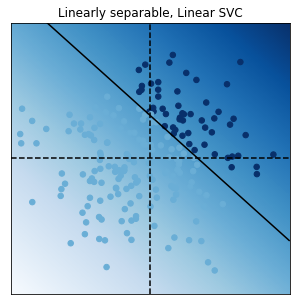

In [46]:
# 線形SVCによる直線分割

plot_decision_function(est);
plt.title("Linearly separable, Linear SVC");

Score: 0.5


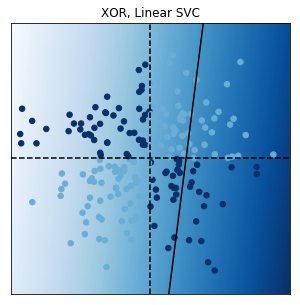

In [47]:
# XOR関数によるラベル付け

y = np.logical_xor(X[:, 0]>0, X[:, 1]>0)
# 分類器の学習
est = gs.GridSearchCV(svm.LinearSVC(), {'C': np.logspace(-3., 3., 10)})
est.fit(X, y)
print("Score: {0:.1f}".format(cv.cross_val_score(est, X, y).mean()))
# 決定関数の描画
plot_decision_function(est);
plt.title("XOR, Linear SVC");

Score: 0.940


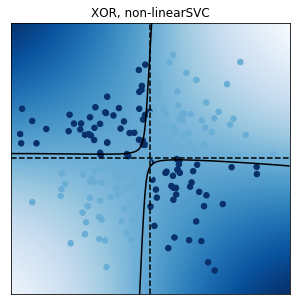

In [48]:
# 非線形SVCの適用

y = np.logical_xor(X[:, 0]>0, X[:, 1]>0)
est = gs.GridSearchCV(svm.SVC(), {'C': np.logspace(-3., 3., 10), 'gamma': np.logspace(-3., 3., 10)})
est.fit(X, y)
print("Score: {0:.3f}".format(cv.cross_val_score(est, X, y).mean()))
plot_decision_function(est.best_estimator_);
plt.title("XOR, non-linearSVC");

In [49]:
# chapter 8-6 ランダメフォレストによる重要な回帰特徴量の選択

In [50]:
import numpy as np
import sklearn as sk
import sklearn.datasets as skd
import sklearn.ensemble as ske
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
data = skd.load_boston()

In [54]:
reg = ske.RandomForestRegressor()

In [55]:
X = data['data']
y = data['target']

In [56]:
reg.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [57]:
fet_ind = np.argsort(reg.feature_importances_)[::-1]
fet_imp = reg.feature_importances_[fet_ind]

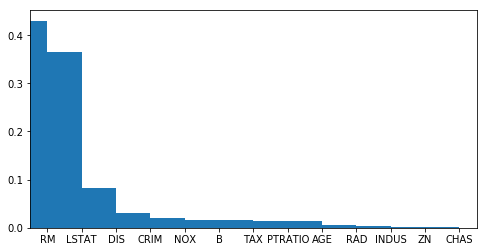

In [60]:
fig = plt.figure(figsize=(8,4));
ax = plt.subplot(111);
plt.bar(np.arange(len(fet_imp)), fet_imp, width=1, lw=2);
plt.grid(False);
ax.set_xticks(np.arange(len(fet_imp))+.5);
ax.set_xticklabels(data['feature_names'][fet_ind]);
plt.xlim(0, len(fet_imp));

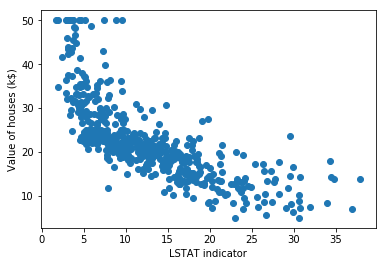

In [61]:
plt.scatter(X[:,-1], y);
plt.xlabel('LSTAT indicator');
plt.ylabel('Value of houses (k$)');

In [62]:
# chapter 8-7 主成分分析によるデータの次元削減

In [63]:
import numpy as np
import sklearn
import sklearn.decomposition as dec
import sklearn.datasets as ds
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
iris = ds.load_iris()
X = iris.data
y = iris.target
print(X.shape)

(150, 4)


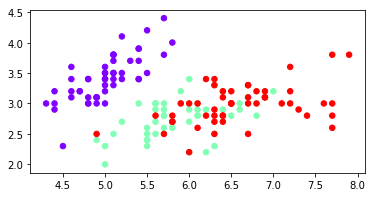

In [66]:
plt.figure(figsize=(6,3));
plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap=plt.cm.rainbow);

In [67]:
X_bis = dec.PCA().fit_transform(X)

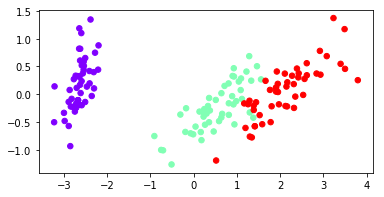

In [68]:
plt.figure(figsize=(6,3));
plt.scatter(X_bis[:,0], X_bis[:,1], c=y, s=30, cmap=plt.cm.rainbow);

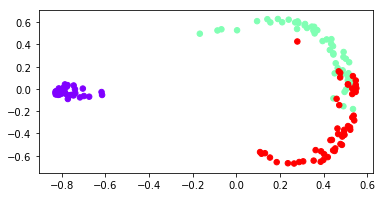

In [69]:
# 非線形版PCAの1つ、KernelPCAを使用
X_ter = dec.KernelPCA(kernel='rbf').fit_transform(X)
plt.figure(figsize=(6,3));
plt.scatter(X_ter[:,0], X_ter[:,1], c=y, s=30, cmap=plt.cm.rainbow);

In [70]:
# データの隠れた構造を抽出するクラスタリング

In [1]:
from itertools import permutations
import numpy as np
import sklearn
import sklearn.decomposition as dec
import sklearn.cluster as clu
import sklearn.datasets as ds
import sklearn.grid_search as gs
import matplotlib.pyplot as plt
%matplotlib inline

/Users/Really/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/Really/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
X, y = ds.make_blobs(n_samples=200, n_features=2, centers=3)

In [3]:
def relabel(cl):
    """Relabel a clustering with three clusters to match the original classes."""
    # 3クラスタの場合には元の値と同じにする
    if np.max(cl) != 2:
        return cl
    perms = np.array(list(permutations((0, 1, 2))))
    i = np.argmin([np.sum(np.abs(perm[cl] - y)) for perm in perms])
    p = perms[i]
    return p[cl]

In [4]:
def display_clustering(labels, title):
    """Plot the data points with the cluster colors."""
    # 3クラスタの場合にはラベル付けを直す
    labels = relabel(labels)
    plt.figure(figsize=(8,3));
    # 左に元のラベル付けで、右にはクラスタリングの結果を表示する
    for i, (c, title) in enumerate(zip([y, labels], ["True labels", title])):
        plt.subplot(121 + i);
        plt.scatter(X[:,0], X[:,1], c=c, s=30, linewidths=0, cmap=plt.cm.rainbow);
        plt.xticks([]); plt.yticks([]);
        plt.title(title)

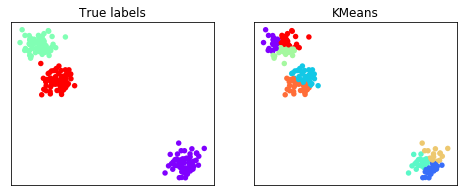

In [6]:
# K-means
km = clu.KMeans()
km.fit(X)
display_clustering(km.labels_, "KMeans")

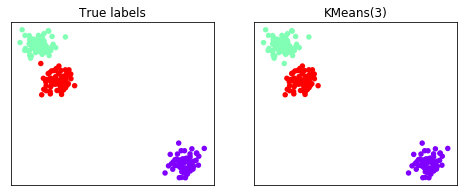

In [7]:
# この例ではデータを生成した際に既知であるクラスタ数=3で試してみる
km = clu.KMeans(n_clusters=3)
km.fit(X)
display_clustering(km.labels_, "KMeans(3)")

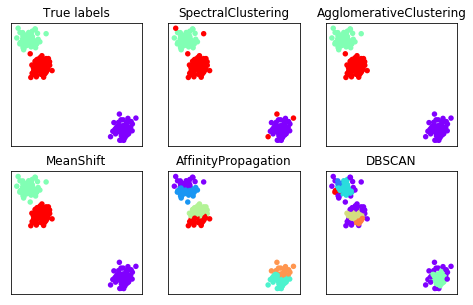

In [8]:
# 他のいくつかのアルゴリズムによるクラスタリング
plt.figure(figsize=(8,5));
plt.subplot(231);
plt.scatter(X[:,0], X[:,1], c=y, s=30, linewidths=0, cmap=plt.cm.rainbow);
plt.xticks([]); plt.yticks([]);
plt.title("True labels");
for i, est in enumerate([clu.SpectralClustering(3),
                        clu.AgglomerativeClustering(3),
                        clu.MeanShift(),
                        clu.AffinityPropagation(),
                        clu.DBSCAN()]):
    est.fit(X)
    c = relabel(est.labels_)
    plt.subplot(232 + i);
    plt.scatter(X[:,0], X[:,1], c=c, s=30, linewidths=0, cmap=plt.cm.rainbow);
    plt.xticks([]); plt.yticks([]);
    plt.title(est.__class__.__name__);